In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.1MB/s 


In [3]:
import pandas as pd
import numpy as np
import pydicom
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")

In [4]:
%cd /content/drive/MyDrive/Self \Case \Study \2/DATASET/ 

/content/drive/MyDrive/Self Case Study 2/DATASET


In [ ]:
train_df = pd.read_csv('Train Dataset/siim/train-rle.csv')
train_df.head(2)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...


In [ ]:
print('The Shape of the Dataset : ',train_df.shape)
train_df.describe()

The Shape of the Dataset :  (12954, 2)


,ImageId,EncodedPixels
count,12954,12954
unique,12047,3577
top,1.2.276.0.7230010.3.1.4.8323329.1851.151787516...,-1
freq,10,9378


In [ ]:
print(' There are total {} records that are duplicate.'.format(train_df['ImageId'].count() - train_df['ImageId'].nunique()))

 There are total 907 records that are duplicate.


In [ ]:
train_df.drop_duplicates(subset = 'ImageId',inplace=True)
print('Total Unique Rows : ',train_df.shape[0])

Total Unique Rows :  12047


In [ ]:
train_source = 'Train Dataset/siim/dicom-images-train/**/*.dcm'
test_source = 'Train Dataset/siim/dicom-images-test/**/*.dcm'

# Create Directories to move files
train_destination = 'Train Dataset/siim/train_dicom_images'
test_destination = 'Train Dataset/siim/test_dicom_images'

if not os.path.isdir(train_destination):
  os.makedirs(train_destination)
if not os.path.isdir(test_destination):
  os.makedirs(test_destination) 

In [ ]:
#https://stackoverflow.com/questions/8858008/how-to-move-a-file

def move_images(source, dest):
    print(source)
    print(dest)
    for file in tqdm(glob2.glob(source)):
        shutil.move(str(file),dest)

move_images(train_source, train_destination)
move_images(test_source, test_destination)

Train Dataset/siim/dicom-images-train/**/*.dcm
Train Dataset/siim/train_dicom_images


100%|██████████| 12089/12089 [00:53<00:00, 225.24it/s]


Train Dataset/siim/dicom-images-test/**/*.dcm
Train Dataset/siim/test_dicom_images


100%|██████████| 3205/3205 [00:12<00:00, 249.26it/s]


In [ ]:
print('Train Image :\n', os.listdir('Train Dataset/siim/train_dicom_images')[:2])
print('\nTest Image :\n', os.listdir('Train Dataset/siim/test_dicom_images')[:2])

Train Image :
 ['1.2.276.0.7230010.3.1.4.8323329.10425.1517875223.660376.dcm', '1.2.276.0.7230010.3.1.4.8323329.10419.1517875223.626705.dcm']

Test Image :
 ['ID_de91b6f09.dcm', 'ID_db54d1349.dcm']


In [ ]:
train_df['ImagePath'] = 'Train Dataset/siim/train_dicom_images/'+ train_df['ImageId']+'.dcm'

In [ ]:
# save the .csv file for further use
train_df.to_csv('Train Dataset/siim/train_dicom_images.csv', index=False)
train_df.head()

,ImageId,EncodedPixels,ImagePath
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1,Train Dataset/siim/train_dicom_images/1.2.276....
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...,Train Dataset/siim/train_dicom_images/1.2.276....
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...,Train Dataset/siim/train_dicom_images/1.2.276....


In [5]:
train_df = pd.read_csv('Train Dataset/siim/train_dicom_images.csv')
train_df.head(2)

,ImageId,EncodedPixels,ImagePath
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/stage_2_sample_submission.csv')
test_df.head(2)

,ImageId,EncodedPixels
0,ID_c68e114ba,-1
1,ID_b5a797789,-1


In [ ]:
print('Total number of records in test data : ', test_df.shape[0])

Total number of records in test data :  3205


In [ ]:
test_df = test_df.drop('EncodedPixels', axis=1)

In [ ]:
test_df['ImagePath'] = 'Train Dataset/siim/test_dicom_images/'+ test_df['ImageId']+'.dcm'

In [ ]:
# save the .csv file for further use
test_df.to_csv('Train Dataset/siim/test_dicom_images.csv', index=False)
test_df.head()

,ImageId,ImagePath
0,ID_c68e114ba,Train Dataset/siim/test_dicom_images/ID_c68e11...
1,ID_b5a797789,Train Dataset/siim/test_dicom_images/ID_b5a797...
2,ID_490a04f54,Train Dataset/siim/test_dicom_images/ID_490a04...
3,ID_823ca20e1,Train Dataset/siim/test_dicom_images/ID_823ca2...
4,ID_5face2763,Train Dataset/siim/test_dicom_images/ID_5face2...


In [6]:
test_df = pd.read_csv('Train Dataset/siim/test_dicom_images.csv')
test_df.head(2)

,ImageId,ImagePath
0,ID_c68e114ba,Train Dataset/siim/test_dicom_images/ID_c68e11...
1,ID_b5a797789,Train Dataset/siim/test_dicom_images/ID_b5a797...


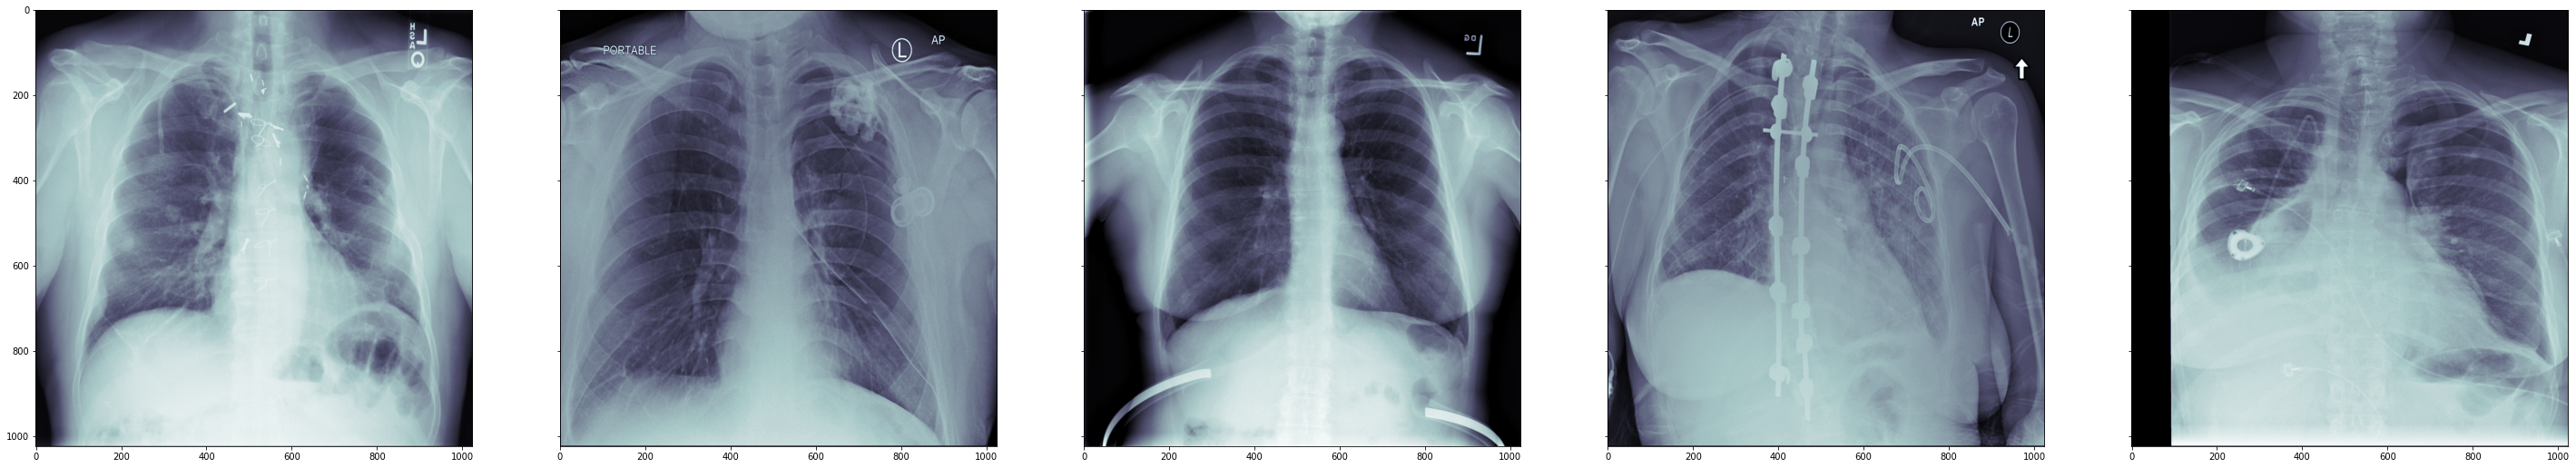

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(5*10,10))
for i in range(5):
    train_image = pydicom.dcmread(train_df['ImagePath'][i])
    #ax[i].title("Age : {}, Sex : {}".format(train_image.PatientAge, train_image.PatientSex))
    ax[i].imshow(train_image.pixel_array, cmap=plt.cm.bone)

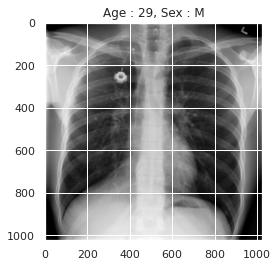

In [ ]:
train_image = pydicom.read_file(train_df['ImagePath'][20])
plt.title("Age : {}, Sex : {}".format(train_image.PatientAge, train_image.PatientSex))
plt.imshow(train_image.pixel_array,cmap=plt.cm.gray)

In [ ]:
print('Meta Data of the Image :\n')
train_image

Meta Data of the Image :



Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.32060.1517875158.251634
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.32060.1517875158.251634
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
age = []
gender = []
modality = []
viewPosition = []

for img in tqdm(train_df['ImagePath']):
    dcmImage = pydicom.dcmread(img)
    age.append(dcmImage.PatientAge)
    gender.append(dcmImage.PatientSex)
    modality.append(dcmImage.Modality)
    viewPosition.append(dcmImage.ViewPosition)

In [ ]:
train_metaData = pd.DataFrame()
train_metaData['ImageId'] = train_df['ImageId']
train_metaData['Gender'] = gender
train_metaData['Age'] = age
train_metaData['Modality'] = modality
train_metaData['ViewPosition'] = viewPosition
train_metaData['Pneumothorax'] = train_df[' EncodedPixels'].apply(lambda x: 'No' if x=='-1' else 'Yes')
train_metaData.head()

,ImageId,Gender,Age,Modality,ViewPosition,Pneumothorax
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,M,62,CR,PA,No
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,M,34,CR,AP,Yes
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,F,52,CR,PA,No
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,F,30,CR,AP,Yes
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,F,57,CR,PA,Yes


In [ ]:
train_metaData.to_csv('Train Dataset/siim/train_metaData.csv', index=False)

In [15]:
train_metaData = pd.read_csv('Train Dataset/siim/train_metaData.csv')

In [ ]:
gender = train_metaData['Gender'].value_counts()
mod = train_metaData['Modality'].value_counts()
viewPos = train_metaData['ViewPosition'].value_counts()
target = train_metaData['Pneumothorax'].value_counts()

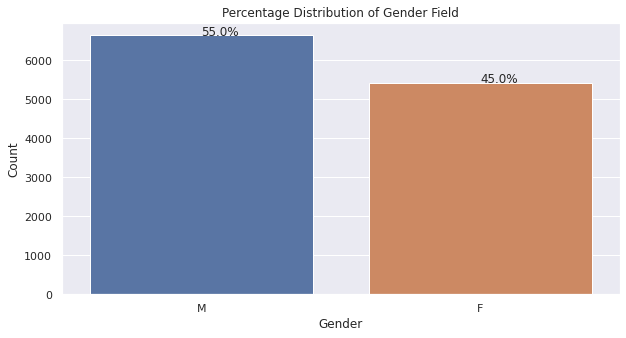

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot('Gender', data=train_metaData, order=train_metaData['Gender'].value_counts().index)
for i in range(gender.shape[0]):
    range_count = gender[i]
    per = round(((range_count*100)/train_metaData.shape[0]),2)
    percent='{}%'.format(per)
    plt.text(i,range_count,percent)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Percentage Distribution of Gender Field')
plt.show()

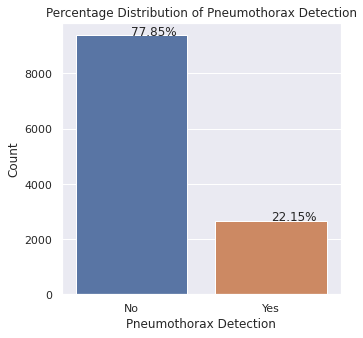

In [ ]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
sns.countplot('Pneumothorax', data=train_metaData, order=train_metaData['Pneumothorax'].value_counts().index)
for i in range(target.shape[0]):
    range_count = target[i]
    per = round(((range_count*100)/train_metaData.shape[0]),2)
    percent='{}%'.format(per)
    plt.text(i,range_count,percent)
plt.xlabel('Pneumothorax Detection')
plt.ylabel('Count')
plt.title('Percentage Distribution of Pneumothorax Detection')
plt.show()

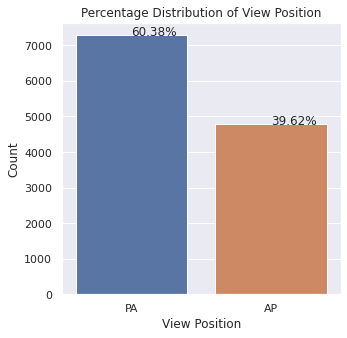

In [ ]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
sns.countplot('ViewPosition', data=train_metaData, order=train_metaData['ViewPosition'].value_counts().index)
for i in range(viewPos.shape[0]):
    range_count = viewPos[i]
    per = round(((range_count*100)/train_metaData.shape[0]),2)
    percent='{}%'.format(per)
    plt.text(i,range_count,percent)
plt.xlabel('View Position')
plt.ylabel('Count')
plt.title('Percentage Distribution of View Position')
plt.show()

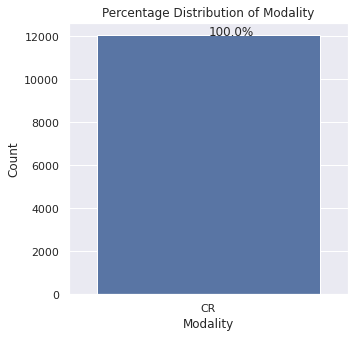

In [ ]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
sns.countplot('Modality', data=train_metaData, order=train_metaData['Modality'].value_counts().index)
for i in range(mod.shape[0]):
    range_count = mod[i]
    per = round(((range_count*100)/train_metaData.shape[0]),2)
    percent='{}%'.format(per)
    plt.text(i,range_count,percent)
plt.xlabel('Modality')
plt.ylabel('Count')
plt.title('Percentage Distribution of Modality')
plt.show()

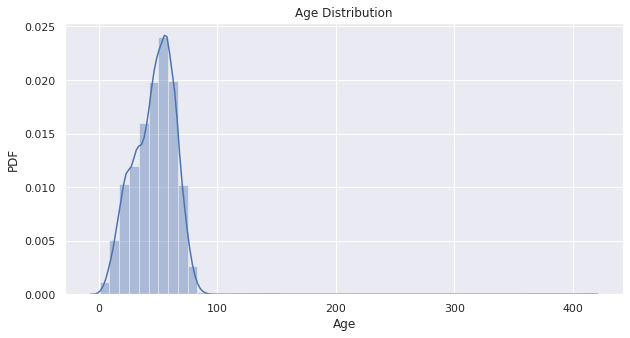

In [ ]:
#Plotting the distribution for the 'age' field :

plt.figure(figsize = (10,5))
sns.set(style='darkgrid')
sns.distplot(train_metaData['Age'])
plt.xlabel('Age')
plt.ylabel('PDF')
plt.title('Age Distribution')
plt.show()

In [ ]:
train_metaData['Age'].describe()

count     12047
unique       93
top          58
freq        365
Name: Age, dtype: object

In [ ]:
age = train_metaData["Age"].value_counts()
print(age)

58     365
57     314
51     303
55     295
52     290
      ... 
148      1
1        1
94       1
90       1
413      1
Name: Age, Length: 93, dtype: int64


In [ ]:
train_metaData_dis_gender= train_metaData.groupby(['Pneumothorax','Gender']).count()
train_metaData_dis_gender.reset_index(inplace=True)

In [ ]:
train_metaData_dis_gender.head()

,Pneumothorax,Gender,ImageId,Age,Modality,ViewPosition
0,No,F,4241,4241,4241,4241
1,No,M,5137,5137,5137,5137
2,Yes,F,1180,1180,1180,1180
3,Yes,M,1489,1489,1489,1489


Text(0, 0.5, 'Counts')

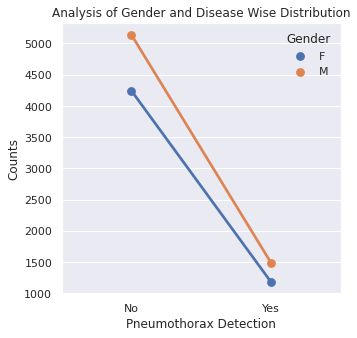

In [ ]:
#Plotting the 'Pneumothorax' and 'Gender' :

plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
sns.pointplot(data=train_metaData_dis_gender,x='Pneumothorax',y='Age',hue='Gender');
plt.title('Analysis of Gender and Disease Wise Distribution');
plt.xlabel('Pneumothorax Detection')
plt.ylabel('Counts')

In [ ]:
healthy_male = len(train_metaData[(train_metaData['Gender'] == 'M') & (train_metaData['Pneumothorax']== 'No')])
healthy_female = len(train_metaData[(train_metaData['Gender'] == 'F') & (train_metaData['Pneumothorax']== 'No')])
sick_male = len(train_metaData[(train_metaData['Gender'] == 'M') & (train_metaData['Pneumothorax']== 'Yes')])
sick_female = len(train_metaData[(train_metaData['Gender'] == 'F') & (train_metaData['Pneumothorax']== 'Yes')])

total_male = len(train_metaData[train_metaData['Gender'] == 'M'])
total_female = len(train_metaData[train_metaData['Gender'] == 'F'])

print('Total Male : ', total_male)
print('Total Healthy Male : {} ({}%) '.format(healthy_male,round(healthy_male/total_male, 3)*100))
print('Total Sick Male : {} ({}%)'.format(sick_male,round(sick_male/total_male, 3)*100))
print('----------------------------------------')
print('Total Female : ', total_female)
print('Total Healthy Female : {} ({}%) '.format(healthy_female,round(healthy_female/total_female, 3)*100))
print('Total Sick Female : {} ({}%) '.format(sick_female,round(sick_female/total_female, 3)*100))

Total Male :  6626
Total Healthy Male : 5137 (77.5%) 
Total Sick Male : 1489 (22.5%)
----------------------------------------
Total Female :  5421
Total Healthy Female : 4241 (78.2%) 
Total Sick Female : 1180 (21.8%) 


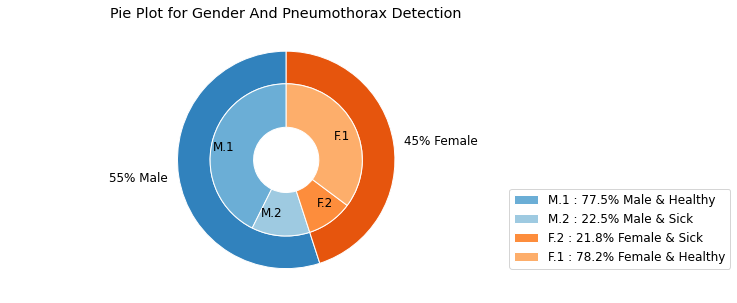

In [ ]:
#https://matplotlib.org/3.3.4/gallery/pie_and_polar_charts/nested_pie.html
#https://stackoverflow.com/questions/55267993/add-legends-to-nested-pie-charts


group_names=["55% Male", "45% Female"]
subgroup_names = ["M.1", "M.2","F.2", "F.1"]
subgroup_names_legends = ["M.1 : 77.5% Male & Healthy", "M.2 : 22.5% Male & Sick","F.2 : 21.8% Female & Sick", "F.1 : 78.2% Female & Healthy"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.axis('equal')
size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 2, 5, 6])

mypie,_ = ax.pie([total_male,total_female], radius=1, colors=outer_colors, labels=group_names,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')

mypie2,_ =  ax.pie([healthy_male,sick_male,sick_female,healthy_female], radius=1-size, colors=inner_colors,labels=subgroup_names, labeldistance=0.7,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90)
plt.setp( mypie2, width=0.4, edgecolor='white')

ax.set(aspect="equal", title='Pie Plot for Gender And Pneumothorax Detection')
plt.rcParams['font.size'] = 12.0

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[2:], subgroup_names_legends, loc=(0.9, 0.1))
plt.show()

In [ ]:
train_metaData_dis_pos= train_metaData.groupby(['Pneumothorax','ViewPosition']).count()
train_metaData_dis_pos.reset_index(inplace=True)
train_metaData_dis_pos.head()

,Pneumothorax,ViewPosition,ImageId,Gender,Age,Modality
0,No,AP,3801,3801,3801,3801
1,No,PA,5577,5577,5577,5577
2,Yes,AP,972,972,972,972
3,Yes,PA,1697,1697,1697,1697


Text(0, 0.5, 'Counts')

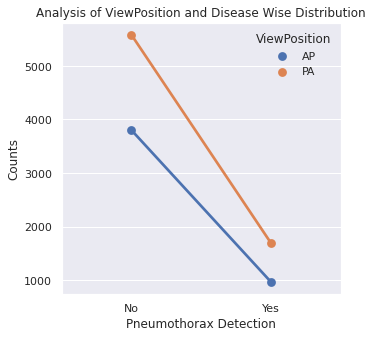

In [ ]:
#Plotting the 'country_destination' and 'gender' :
plt.figure(figsize=(5,5))
sns.set(style = 'darkgrid')
sns.pointplot(data=train_metaData_dis_pos,x='Pneumothorax',y='Age',hue='ViewPosition');
plt.title('Analysis of ViewPosition and Disease Wise Distribution');
plt.xlabel('Pneumothorax Detection')
plt.ylabel('Counts')

In [ ]:
healthy_ap = len(train_metaData[(train_metaData['ViewPosition'] == 'AP') & (train_metaData['Pneumothorax']== 'No')])
healthy_pa = len(train_metaData[(train_metaData['ViewPosition'] == 'PA') & (train_metaData['Pneumothorax']== 'No')])
sick_ap = len(train_metaData[(train_metaData['ViewPosition'] == 'AP') & (train_metaData['Pneumothorax']== 'Yes')])
sick_pa = len(train_metaData[(train_metaData['ViewPosition'] == 'PA') & (train_metaData['Pneumothorax']== 'Yes')])

total_ap = len(train_metaData[train_metaData['ViewPosition'] == 'AP'])
total_pa = len(train_metaData[train_metaData['ViewPosition'] == 'PA'])

print('Total View Position = AP : ', total_ap)
print('Total Healthy AP : {} ({}%) '.format(healthy_ap,round(healthy_ap/total_ap, 2)*100))
print('Total Sick AP : {} ({}%)'.format(sick_ap,round(sick_ap/total_ap, 3)*100))
print('----------------------------------------')
print('Total View Position = PA : ', total_pa)
print('Total Healthy PA : {} ({}%) '.format(healthy_pa,round(healthy_pa/total_pa, 3)*100))
print('Total Sick PA : {} ({}%) '.format(sick_pa,round(sick_pa/total_pa, 3)*100))

Total View Position = AP :  4773
Total Healthy AP : 3801 (80.0%) 
Total Sick AP : 972 (20.4%)
----------------------------------------
Total View Position = PA :  7274
Total Healthy PA : 5577 (76.7%) 
Total Sick PA : 1697 (23.3%) 


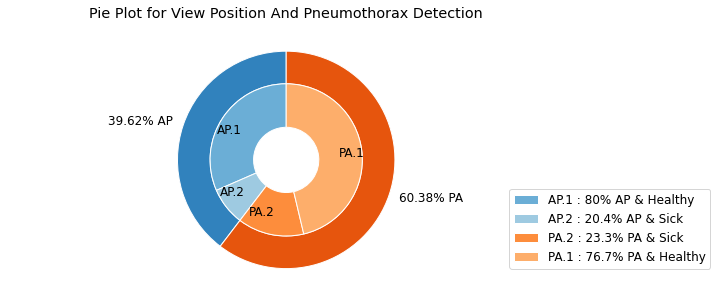

In [ ]:
#https://matplotlib.org/3.3.4/gallery/pie_and_polar_charts/nested_pie.html
#https://stackoverflow.com/questions/55267993/add-legends-to-nested-pie-charts


group_names=["39.62% AP", "60.38% PA"]
subgroup_names = ["AP.1", "AP.2","PA.2", "PA.1"]
subgroup_names_legends = ["AP.1 : 80% AP & Healthy", "AP.2 : 20.4% AP & Sick","PA.2 : 23.3% PA & Sick", "PA.1 : 76.7% PA & Healthy"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.axis('equal')
size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 2, 5, 6])

mypie,_ = ax.pie([total_ap,total_pa], radius=1, colors=outer_colors, labels=group_names,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')

mypie2,_ =  ax.pie([healthy_ap,sick_ap,sick_pa,healthy_pa], radius=1-size, colors=inner_colors,labels=subgroup_names, labeldistance=0.7,
       wedgeprops=dict(width=size, edgecolor='w'), startangle=90)
plt.setp( mypie2, width=0.4, edgecolor='white')

ax.set(aspect="equal", title='Pie Plot for View Position And Pneumothorax Detection')
plt.rcParams['font.size'] = 12.0

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[2:], subgroup_names_legends, loc=(0.9, 0.1))
plt.show()

In [ ]:
Train Dataset/siim/train_dicom_images

In [7]:
os.getcwd()

'/content/drive/My Drive/Self Case Study 2/DATASET'

In [14]:
traindir = os.getcwd()+'/Train Dataset/siim/train_dicom_images/'
test_list = [os.path.basename(x) for x in glob2.glob(traindir + './*.dcm')]
print(len(test_list)) 

12089


In [20]:
# Create Directories for png files
train_png_dest = 'Train Dataset/siim/train_png_images'
test_png_dest = 'Train Dataset/siim/test_png_images'

if not os.path.isdir(train_png_dest):
    os.makedirs(train_png_dest)
if not os.path.isdir(test_png_dest):
    os.makedirs(test_png_dest)

In [47]:
##https://www.kaggle.com/onealbao/dicom-to-jpeg-conversion-kernel

def dicom2png(file):
    ds = pydicom.read_file(str(file))
    img = ds.pixel_array
    img = cv2.resize(img, (256,256) )
    fname = file.replace('.dcm','.png')
    fname = fname.replace('_dicom','_png')
    cv2.imwrite(fname, img)

In [48]:
os.getcwd()

'/content/drive/My Drive/Self Case Study 2/DATASET'

In [49]:
for file in tqdm(train_df['ImagePath']):
    dicom2png(file)

Streaming output truncated to the last 5000 lines.

 79%|███████▉  | 9548/12047 [1:29:58<21:48,  1.91it/s]

 79%|███████▉  | 9549/12047 [1:29:59<22:09,  1.88it/s]

 79%|███████▉  | 9550/12047 [1:29:59<23:11,  1.79it/s]

 79%|███████▉  | 9551/12047 [1:30:00<24:07,  1.72it/s]

 79%|███████▉  | 9552/12047 [1:30:00<24:00,  1.73it/s]

 79%|███████▉  | 9553/12047 [1:30:01<23:46,  1.75it/s]

 79%|███████▉  | 9554/12047 [1:30:02<23:54,  1.74it/s]

 79%|███████▉  | 9555/12047 [1:30:02<24:02,  1.73it/s]

 79%|███████▉  | 9556/12047 [1:30:03<24:05,  1.72it/s]

 79%|███████▉  | 9557/12047 [1:30:03<23:07,  1.79it/s]

 79%|███████▉  | 9558/12047 [1:30:04<24:44,  1.68it/s]

 79%|███████▉  | 9559/12047 [1:30:05<24:46,  1.67it/s]

 79%|███████▉  | 9560/12047 [1:30:05<25:08,  1.65it/s]

 79%|███████▉  | 9561/12047 [1:30:06<24:43,  1.68it/s]

 79%|███████▉  | 9562/12047 [1:30:06<25:56,  1.60it/s]

 79%|███████▉  | 9563/12047 [1:30:07<25:17,  1.64it/s]

 79%|███████▉  | 9564/12047 [1:30:08<25:07,  1.65it/

In [50]:
print(os.listdir('Train Dataset/siim/train_png_images/')[10])

1.2.276.0.7230010.3.1.4.8323329.3514.1517875178.176496.png


In [51]:
for file in tqdm(test_df['ImagePath']):
    dicom2png(file)

Streaming output truncated to the last 5000 lines.

 22%|██▏       | 706/3205 [06:54<23:56,  1.74it/s]

 22%|██▏       | 707/3205 [06:55<23:32,  1.77it/s]

 22%|██▏       | 708/3205 [06:55<26:57,  1.54it/s]

 22%|██▏       | 709/3205 [06:56<25:42,  1.62it/s]

 22%|██▏       | 710/3205 [06:57<25:41,  1.62it/s]

 22%|██▏       | 711/3205 [06:57<25:07,  1.65it/s]

 22%|██▏       | 712/3205 [06:58<24:16,  1.71it/s]

 22%|██▏       | 713/3205 [06:58<24:28,  1.70it/s]

 22%|██▏       | 714/3205 [06:59<24:57,  1.66it/s]

 22%|██▏       | 715/3205 [07:00<24:20,  1.71it/s]

 22%|██▏       | 716/3205 [07:00<23:58,  1.73it/s]

 22%|██▏       | 717/3205 [07:01<24:10,  1.72it/s]

 22%|██▏       | 718/3205 [07:01<22:33,  1.84it/s]

 22%|██▏       | 719/3205 [07:02<21:18,  1.95it/s]

 22%|██▏       | 720/3205 [07:02<22:27,  1.84it/s]

 22%|██▏       | 721/3205 [07:03<24:51,  1.67it/s]

 23%|██▎       | 722/3205 [07:03<23:58,  1.73it/s]

 23%|██▎       | 723/3205 [07:04<23:39,  1.75it/s]

 23%|██▎    

In [52]:
print(os.listdir('Train Dataset/siim/test_png_images/')[10])

ID_87a258052.png
